In [100]:
! pip install -r requirements.txt

USE F1 score


In [101]:
# import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

# Data Quality Check & Data Characterization


# 

In [102]:
data = "data/heart.csv"

In [103]:
df = pd.read_csv(data)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [104]:
missing_values = df.isnull().sum()
missing_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [105]:
duplicates = df.duplicated().sum()
duplicates

0

In [106]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Eindeutige Werte für {col}:")
    print(unique_values)

Eindeutige Werte für Sex:
['M' 'F']
Eindeutige Werte für ChestPainType:
['ATA' 'NAP' 'ASY' 'TA']
Eindeutige Werte für RestingECG:
['Normal' 'ST' 'LVH']
Eindeutige Werte für ExerciseAngina:
['N' 'Y']
Eindeutige Werte für ST_Slope:
['Up' 'Flat' 'Down']


In [107]:
# get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [108]:
# check how many unique elements the dataset contains in each column  
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

# Exploratory Data Analysis

/var/folders/3l/_xvv3581559_krvl1r82px5w0000gn/T/ipykernel_23146/1130680269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette=colors_red_green)


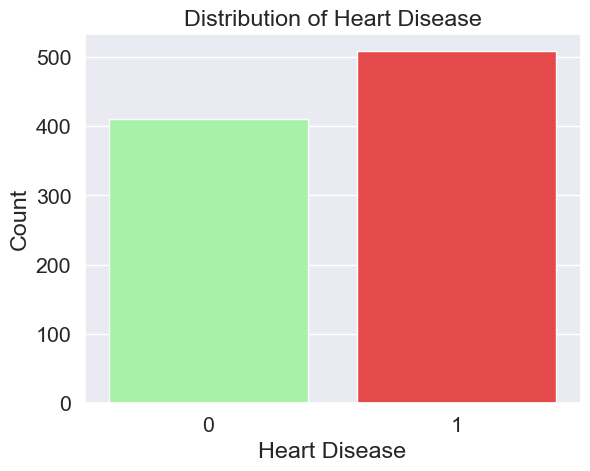

In [109]:
# Visualize disease Distribution in the dataset

colors_red_green = ["#9aff9a", "#ff3030"]

sns.countplot(x='HeartDisease', data=df, palette=colors_red_green)

plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')

plt.show()

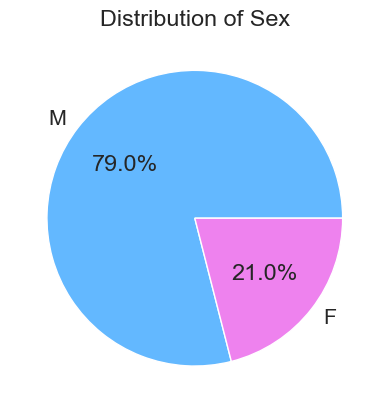

In [111]:
sizes = df["Sex"].value_counts()
colors = ['#63b8ff', '#ee82ee']

plt.title("Distribution of Sex")

plt.pie(sizes, labels=sizes.index, colors=colors, autopct='%1.1f%%')

plt.show()

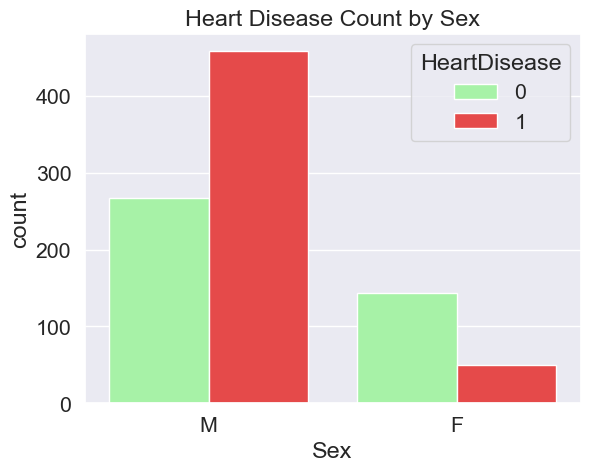

In [110]:
sns.countplot(x='Sex', hue='HeartDisease', data=df, palette=['#9aff9a', '#ff3030'])

plt.xlabel("Sex")
plt.title("Heart Disease Count by Sex")

plt.show()

/var/folders/3l/_xvv3581559_krvl1r82px5w0000gn/T/ipykernel_23146/2677846405.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Age', data=df[df['Sex'] == 'F'], ax=ax2, palette=['#ee82ee'])
/var/folders/3l/_xvv3581559_krvl1r82px5w0000gn/T/ipykernel_23146/2677846405.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Age', data=df[df['Sex'] == 'M'], ax=ax3, palette=['#63b8ff'])


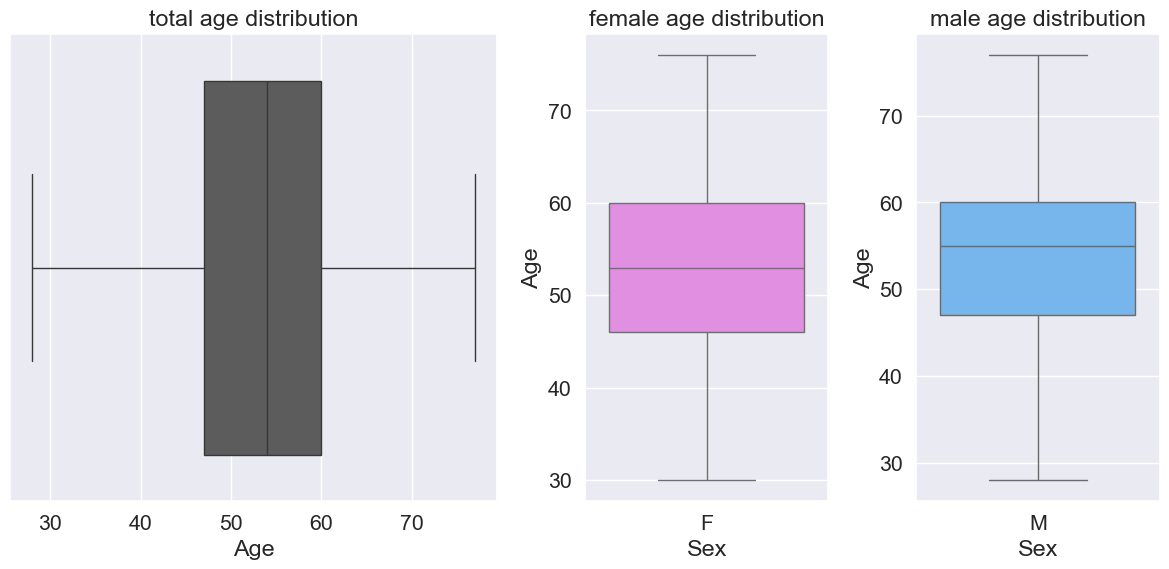

In [112]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[2, 1, 1])

# total age distribution
ax1 = fig.add_subplot(gs[0])
sns.boxplot(x=df["Age"], ax=ax1, color='#5c5c5c')
ax1.set_title('total age distribution')

# female age distribution
ax2 = fig.add_subplot(gs[1])
sns.boxplot(x='Sex', y='Age', data=df[df['Sex'] == 'F'], ax=ax2, palette=['#ee82ee'])
ax2.set_title('female age distribution')

# male age distribution
ax3 = fig.add_subplot(gs[2])
sns.boxplot(x='Sex', y='Age', data=df[df['Sex'] == 'M'], ax=ax3, palette=['#63b8ff']) 
ax3.set_title('male age distribution')

plt.tight_layout()
plt.show()

In [113]:
counts = df["Age"].value_counts()
print("Counts for Age:")
print(counts)

Counts for Age:
Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64


/var/folders/3l/_xvv3581559_krvl1r82px5w0000gn/T/ipykernel_23146/3443486709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['ChestPainType'], palette="rainbow")


Text(0.5, 1.0, 'ChestPainType')

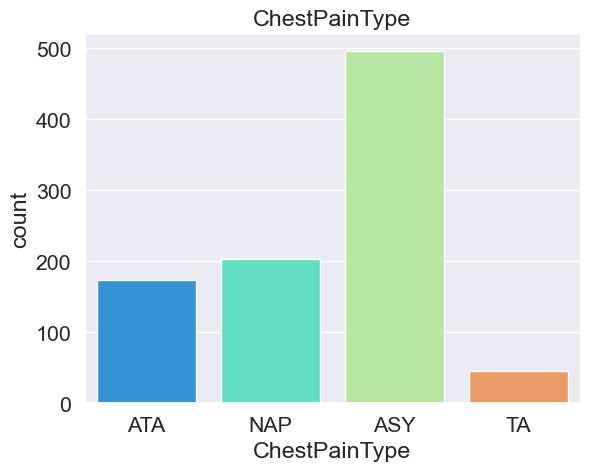

In [114]:
sns.countplot(x=df['ChestPainType'], palette="rainbow")
plt.title('ChestPainType')

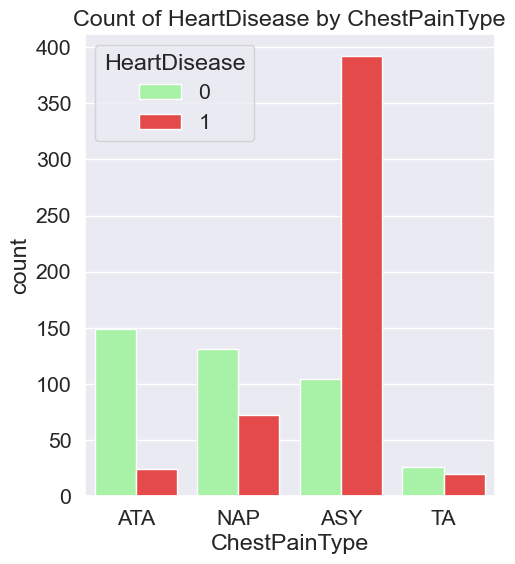

In [115]:
fig = plt.figure(figsize=(12, 6))


ax1 = fig.add_subplot(gs[0])
sns.countplot( x='ChestPainType',hue='HeartDisease', data=df, palette=colors_red_green,ax=ax1)
ax1.set_title('Count of HeartDisease by ChestPainType')

plt.show()

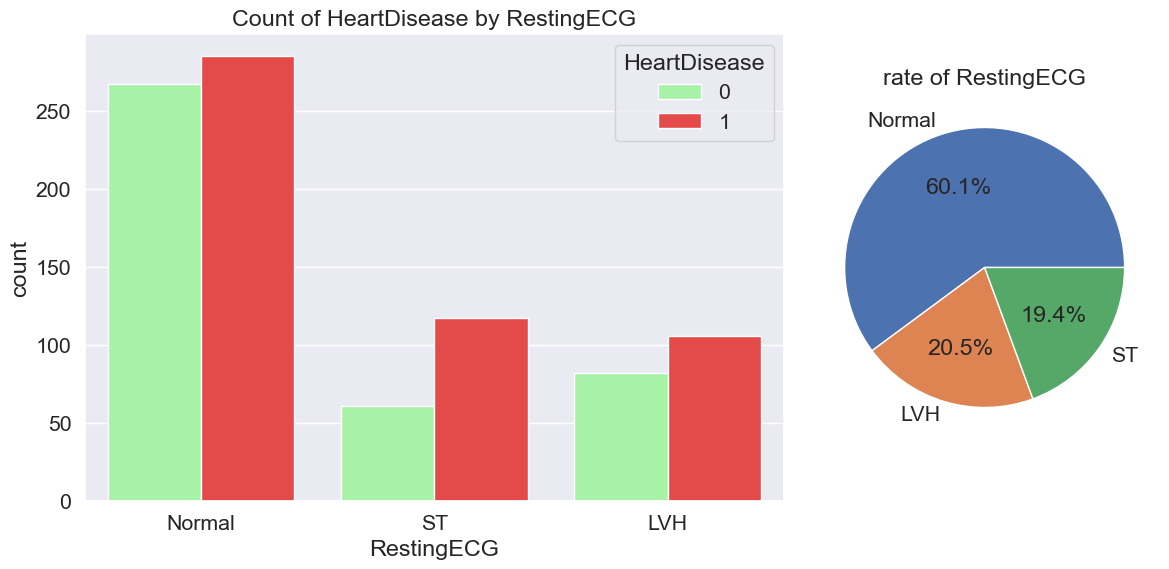

In [116]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='RestingECG',hue='HeartDisease', data=df, palette=colors_red_green,ax=ax1)
ax1.set_title('Count of HeartDisease by RestingECG')


ax2 = fig.add_subplot(gs[1])
types = df['RestingECG'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of RestingECG')

plt.tight_layout()
plt.show()

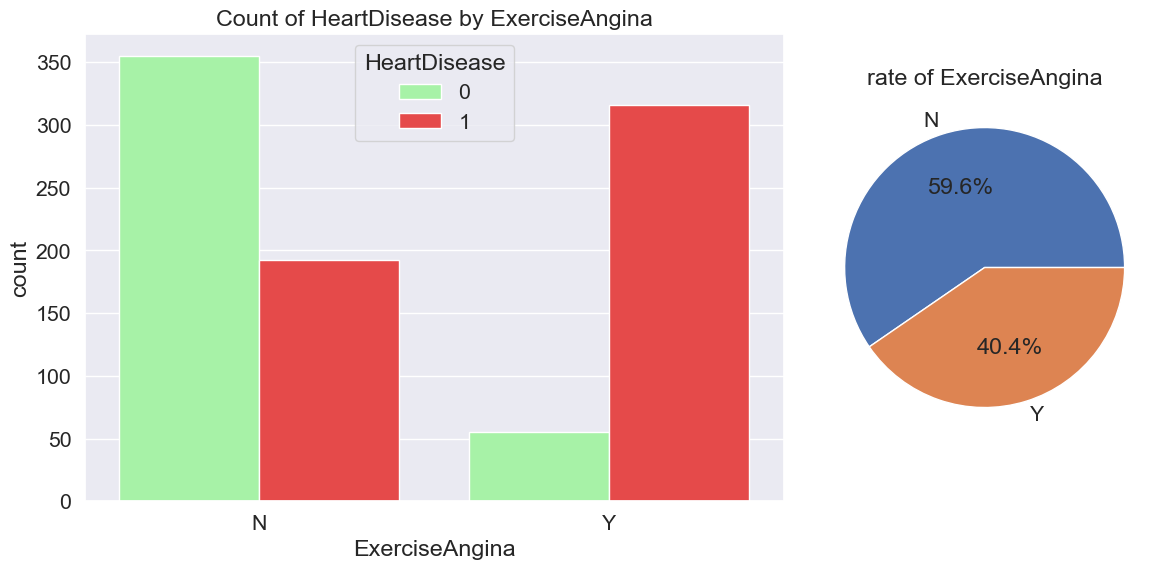

In [117]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='ExerciseAngina',hue='HeartDisease', data=df, palette=colors_red_green,ax=ax1)
ax1.set_title('Count of HeartDisease by ExerciseAngina')


ax2 = fig.add_subplot(gs[1])
types = df['ExerciseAngina'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of ExerciseAngina')

plt.tight_layout()
plt.show()

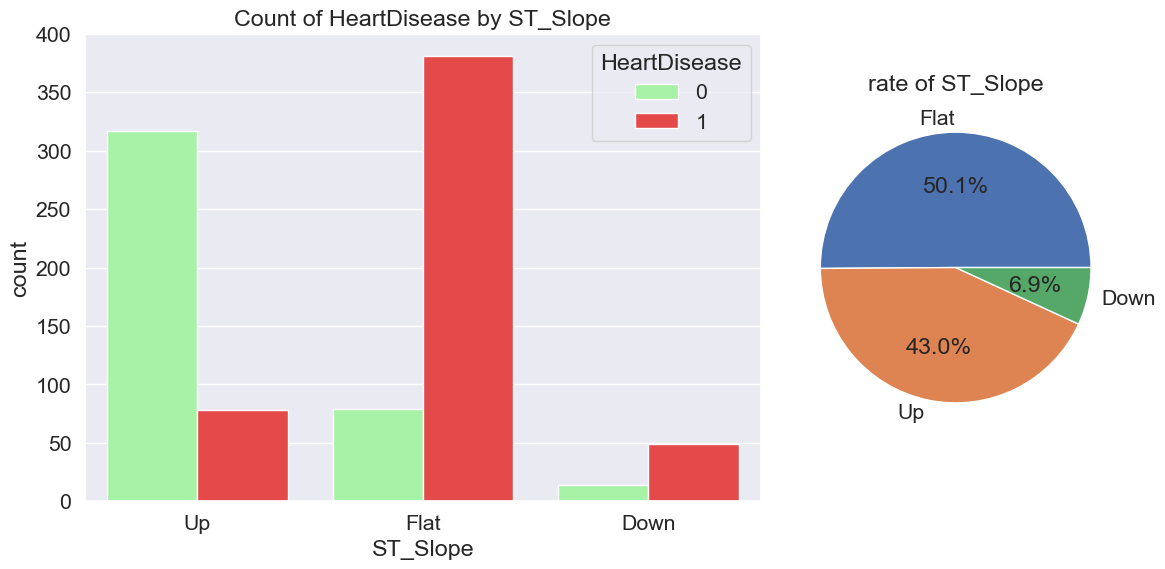

In [118]:

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='ST_Slope',hue='HeartDisease', data=df, palette=colors_red_green,ax=ax1)
ax1.set_title('Count of HeartDisease by ST_Slope')


ax2 = fig.add_subplot(gs[1])
types = df['ST_Slope'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of ST_Slope')

plt.tight_layout()
plt.show()

# Machine Learning 

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC

%matplotlib inline

In [120]:
# featrue engineering
df_encoded = pd.get_dummies(df, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"])

In [121]:
# preparation for train/test split
target = df_encoded["HeartDisease"]
features = df_encoded.drop("HeartDisease", axis=1)

In [122]:
# train/test split (80%/20%)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [123]:
def model(classifier):
    
    classifier.fit(features_train,target_train)
    prediction = classifier.predict(features_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(target_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,features_train,target_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(target_test,prediction)))
    

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(target_test,classifier.predict(features_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(target_test,classifier.predict(features_test)))

# ML: Random Forrest

In [124]:
forest = RandomForestClassifier()
model(forest)

Accuracy :  90.76%
Cross Validation Score :  92.14%
ROC_AUC Score :  90.35%


              precision    recall  f1-score   support

           0       0.92      0.87      0.89        82
           1       0.90      0.94      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.91       184
weighted avg       0.91      0.91      0.91       184



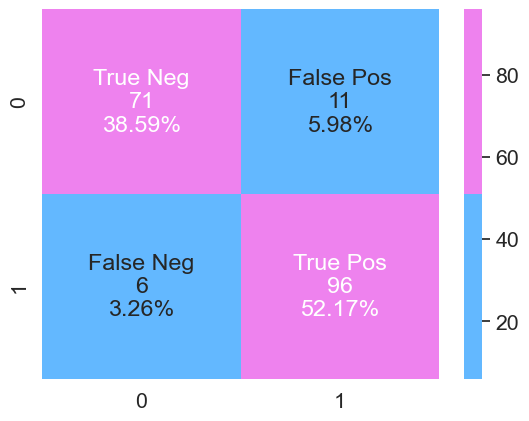

In [125]:
model_evaluation(forest)

# ML: Logistic Regression

In [135]:
classifier_lr = LogisticRegression(max_iter=10000)
model(classifier_lr)

Accuracy :  88.59%
Cross Validation Score :  92.34%
ROC_AUC Score :  88.03%


              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



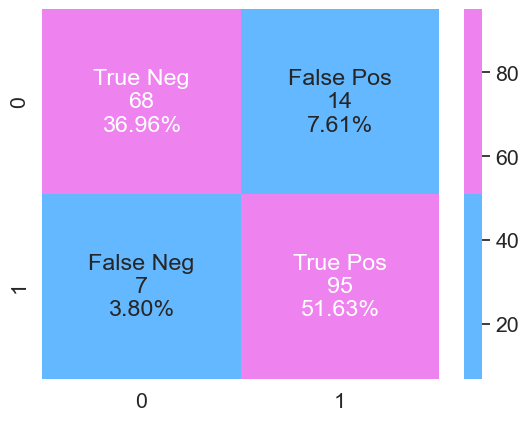

In [127]:
model_evaluation(classifier_lr)

# ML: Support Vector Machine

In [128]:
svc = SVC(kernel = 'linear', C = 0.1)
model(svc)

Accuracy :  87.50%
Cross Validation Score :  92.08%
ROC_AUC Score :  86.93%


              precision    recall  f1-score   support

           0       0.89      0.82      0.85        82
           1       0.86      0.92      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



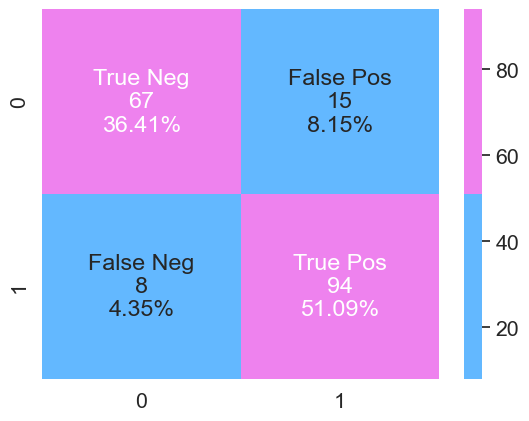

In [129]:
model_evaluation(svc)

# Gridsearch Prameter Tuning


In [130]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Anzahl der Bäume im Wald
    'max_depth': [None, 10, 20, 30],  # Maximale Tiefe der Bäume
    'min_samples_split': [2, 5, 10],   # Minimale Anzahl von Samples, die erforderlich sind, um einen Knoten zu teilen
    'min_samples_leaf': [1, 2, 4]      # Minimale Anzahl von Samples, die in einem Blattknoten erforderlich sind
}

In [131]:
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [132]:
grid_search.fit(features_train, target_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [133]:
print("Beste Hyperparameter-Kombinationen: ", grid_search.best_params_)
print("Beste Performance: ", grid_search.best_score_)

Beste Hyperparameter-Kombinationen:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Beste Performance:  0.8746249184605348
